In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense,Flatten



In [173]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [174]:
X_test.dtype

dtype('uint8')

In [175]:
X_train.shape
# total 60000(images) row with each 28 * 28 pixels
# 28 * 28 matrix have values ranging from 0 to 255
# here some are big like 250+ and some are in 10 so we should squeeze to
# some small range rather than 0 to 255 so here each can divide ith 255 to get values from 0 to 1 X_train/255
# also it can be done by standardisation
# 28 * 28 = 784 values are ther ein each matrix (2d array)
# we should give 784 values as a input to ann (i/p layer)so convert 28 * 28 into 1d using flatten

(60000, 28, 28)

In [176]:
#method -1
X_train = X_train/255
X_test = X_test/255
X_train[5]
#method-2
#standardisation
# mean = X_train.mean()
# std = X_train.std()

# X_train = (X_train - mean) / std
# X_test = (X_test - mean) / std

# display(X_train[5])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [177]:
# Execute cell lboJ6UV2lIgZ to apply standardization
# The code in cell lboJ6UV2lIgZ is already set up for standardization as per the previous step.
# After execution, the X_train and X_test variables will contain the standardized data.

1


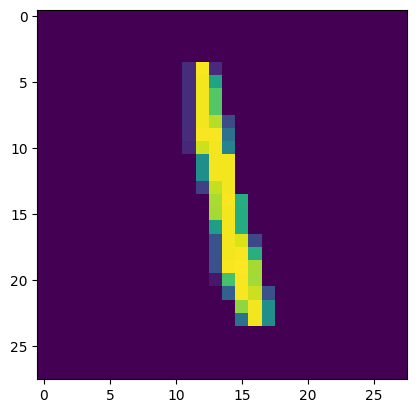

In [178]:
print(y_train[104])
plt.imshow(X_train[104])

In [179]:
model = Sequential()
input_flaten = Flatten(input_shape=(28,28))
model.add(input_flaten)
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [180]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [181]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=32,verbose=1)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8731 - loss: 0.4284 - val_accuracy: 0.9612 - val_loss: 0.1242
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9668 - loss: 0.1111 - val_accuracy: 0.9676 - val_loss: 0.1055
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9758 - loss: 0.0762 - val_accuracy: 0.9711 - val_loss: 0.0930
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9830 - loss: 0.0546 - val_accuracy: 0.9771 - val_loss: 0.0779
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9865 - loss: 0.0418 - val_accuracy: 0.9735 - val_loss: 0.0848
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9887 - loss: 0.0353 - val_accuracy: 0.9749 - val_loss: 0.0850
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9913 - loss: 0.0276 - val_accuracy: 0.9734 - val_loss: 0.0980
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9928 - loss: 0.0216 -

In [182]:
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
print(y_pred)
y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[7 2 1 ... 4 5 6]


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [183]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)#15 epoch = 0.9755 , 30 epoch = 0.9765 ,epoch 20 = 0.9786

0.9786

In [184]:
# X_test[0]

In [185]:
# X_test[0].reshape(1,28,28)

In [186]:
# model.predict(X_test[0]).argmax()
model.predict(X_test[0].reshape(1, 28, 28))#model always expects input in batches.
#.reshape only for batch not for 28 * 28 because it is already 28 * 28


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[2.4345381e-19, 3.4978949e-18, 1.0467899e-12, 2.7115957e-12,
        3.2538428e-14, 1.7909658e-17, 1.4090871e-21, 1.0000000e+00,
        4.2442679e-20, 6.7559511e-14]], dtype=float32)

In [187]:
# model.predict(X_test[1].reshape(1,28,28)).argmax()#np.int64(2)
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)#array([2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([2])

In [188]:
# plt.imshow(X_test[0])

In [189]:
import sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 970,    1,    1,    1,    0,    0,    3,    1,    3,    0],
       [   0, 1119,    2,    1,    1,    1,    4,    1,    6,    0],
       [   1,    1, 1008,    3,    4,    0,    0,    7,    8,    0],
       [   1,    0,    5,  967,    0,   17,    0,    4,   12,    4],
       [   0,    0,    6,    1,  966,    0,    1,    5,    1,    2],
       [   2,    0,    0,    5,    2,  872,    6,    1,    2,    2],
       [   2,    1,    1,    1,    1,    1,  951,    0,    0,    0],
       [   0,    1,    5,    1,    2,    0,    0, 1011,    3,    5],
       [   3,    0,    1,    1,    5,    4,    0,    2,  955,    3],
       [   1,    2,    0,    1,   16,    4,    2,    7,    9,  967]])

In [190]:
misclassifications = []
for i in range(len(cm)):
    for j in range(len(cm[0])):
        if i != j:
            misclassifications.append(((i, j), cm[i, j]))

misclassifications.sort(key=lambda x: x[1], reverse=True)

print("top 10 misclassified pairs (actual, predicted):")
for pair, count in misclassifications[:10]:
    print(f"  {pair}: {count} times")

top 10 misclassified pairs (actual, predicted):
  (3, 5): 17 times
  (9, 4): 16 times
  (3, 8): 12 times
  (9, 8): 9 times
  (2, 8): 8 times
  (2, 7): 7 times
  (9, 7): 7 times
  (1, 8): 6 times
  (4, 2): 6 times
  (5, 6): 6 times


In [191]:
actual_9_predicted_4_indices = np.where((y_test == 9) & (y_pred == 4))
actual_9_predicted_4_indices

(array([  78,  813,  874, 1232, 1655, 1901, 2414, 3985, 4369, 4425, 6568,
        6784, 6956, 9517, 9587, 9808]),)

Number of times actual 9 was predicted as 4: 1
Number of times actual 4 was predicted as 9: 2

Examples of actual 9 predicted as 4:


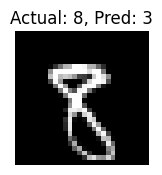


Examples of actual 4 predicted as 9:


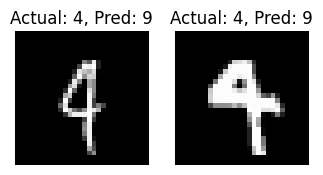

In [192]:
#indices where actual is 9 and predicted is 4
actual_9_predicted_4_indices = np.where((y_test == 8) & (y_pred ==3))[0]

#indices where actual is 4 and predicted is 9
actual_4_predicted_9_indices = np.where((y_test == 4) & (y_pred == 9))[0]

print(f"Number of times actual 9 was predicted as 4: {len(actual_9_predicted_4_indices)}")
print(f"Number of times actual 4 was predicted as 9: {len(actual_4_predicted_9_indices)}")

#actual 9 predicted as 4
print("\nExamples of actual 9 predicted as 4:")
plt.figure(figsize=(10, 2))
for i, index in enumerate(actual_9_predicted_4_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: 8, Pred: 3")
    plt.axis('off')
plt.show()

#actual 4 predicted as 9
print("\nExamples of actual 4 predicted as 9:")
plt.figure(figsize=(10, 2))
for i, index in enumerate(actual_4_predicted_9_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: 4, Pred: 9")
    plt.axis('off')
plt.show()

In [193]:
diagonal_sum = np.trace(cm)
print("sum of diagonal elements:", diagonal_sum,'\n','total points : ',X_test.shape)

sum of diagonal elements: 9786 
 total points :  (10000, 28, 28)


In [194]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.96      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.99      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



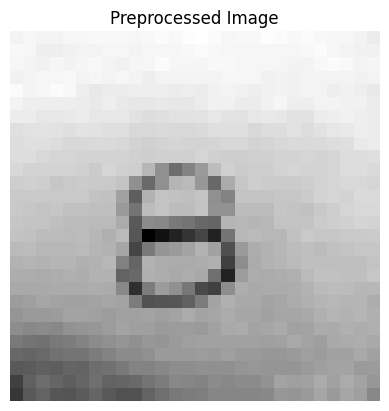

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Predicted digit: 5


In [196]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras

image_path = '/content/eight.jpeg'
img = Image.open(image_path).convert('L') # Convert to grayscale


#resize the image to 28x28 pixels
img = img.resize((28, 28))

#convert the image to a numpy array and normalize
img_array = np.array(img) / 255.0

#reshape the array to match the model's input shape (add batch dimension)
img_array = img_array.reshape(1, 28, 28)

# preprocessed image
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')
plt.show()

#make a prediction using the trained model
y_prob = model.predict(img_array)
predicted_digit = np.argmax(y_prob, axis=1)

print(f"\nPredicted digit: {predicted_digit[0]}")